## Linear Regression Problem - Midterm Exam 2/2567

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import utils
import scipy
from scipy import optimize
from scipy.io import loadmat

In [2]:
# Read tab separated data
data = np.loadtxt(r'D:\M.eng\Machine learning\midterm_crisis\Data\LinearRegressionData.txt')

# First five columns of data are features and the sixth column is the label (Housing Price).
# Matrix X contains five fea
# tures while vector y contains the label.

X = data[:, 0:5]
y = data[:, 5]

m = y.size  # number of training examples

In [3]:
X

array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
        2.30868005e+04],
       [7.92486424e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        4.01730722e+04],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        3.68821594e+04],
       ...,
       [5.36413103e+04, 4.50962279e+00, 7.72875765e+00, 5.40000000e+00,
        3.64721790e+04],
       [5.57165396e+04, 5.03948962e+00, 5.61599221e+00, 4.17000000e+00,
        4.20512955e+04],
       [6.82675028e+04, 5.90727539e+00, 6.80000126e+00, 4.10000000e+00,
        3.59354969e+04]], shape=(4000, 5))

In [4]:
X.shape, y.shape

((4000, 5), (4000,))

In [5]:
# print out some data points

print('{:>6s}{:>30s}{:>30s}' \
      .format('Average Area Income', 'Average Area of the Houses', 'Average Number of Rooms'))

print('{:>19s}{:>30s}{:>30s}' \
      .format('X[:,1]', 'X[:, 2]', 'X[:, 3]'))

print('-'*79)
for i in range(10):
    print('{:19.3f}{:30.3f}{:30.3f}' \
          .format(X[i, 0], X[i, 1], X[i, 2]))

print('')

print('{:>18s}{:>24s}{:>29s}' \
      .format('Average Number of Bedrooms', 'Area Population', 'Housing Prices (in $1000s)'))

print('{:>26s}{:>24s}{:>29s}' \
      .format('X[:, 4]' ,'X[:, 5]' ,'y'))

print('-'*85)
for i in range(10):
    print('{:26.3f}{:24.3f}{:29.3f}' \
          .format(X[i, 3], X[i, 4], y[i]))

Average Area Income    Average Area of the Houses       Average Number of Rooms
             X[:,1]                       X[:, 2]                       X[:, 3]
-------------------------------------------------------------------------------
          79545.459                         5.683                         7.009
          79248.642                         6.003                         6.731
          61287.067                         5.866                         8.513
          63345.240                         7.188                         5.587
          59982.197                         5.041                         7.839
          80175.754                         4.988                         6.105
          64698.463                         6.025                         8.148
          78394.339                         6.990                         6.620
          59927.661                         5.362                         6.393
          81885.927                     

<blockquote>Plot data

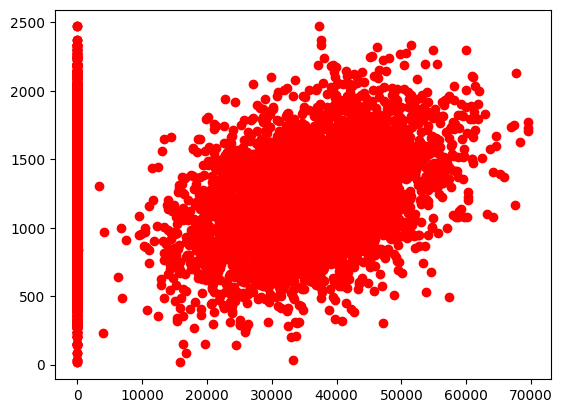

In [6]:
X1 = data[:, 1:5]
X2 = data[:, 2:5]
X3 = data[:, 3:5]
X4 = data[:, 4:5]
X5 = data[:, 5:5]
plt.plot(X1,y,'ro')

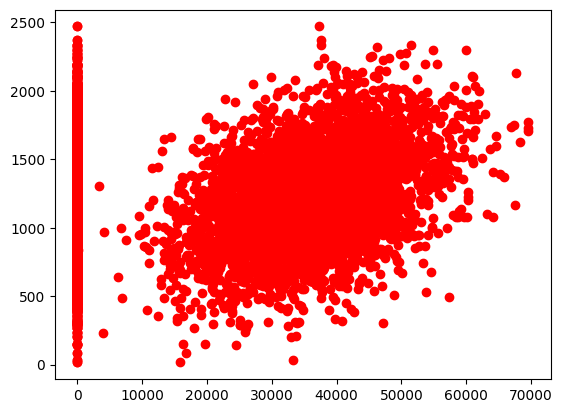

In [7]:
plt.plot(X2,y,'ro')

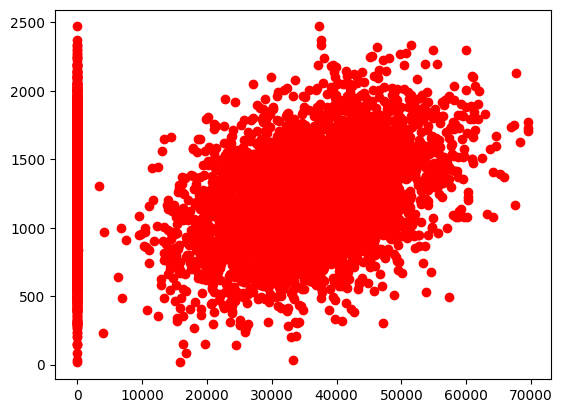

In [8]:
plt.plot(X3,y,'ro')

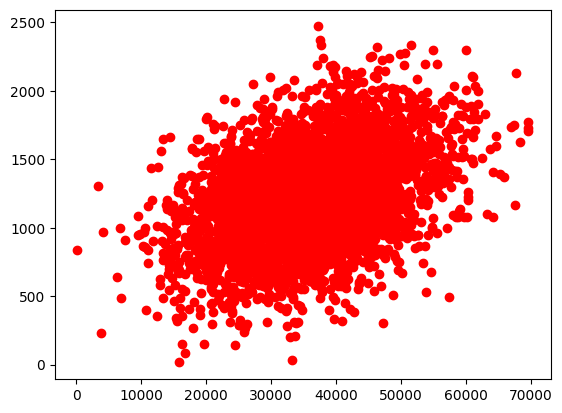

In [9]:
plt.plot(X4,y,'ro')

[]

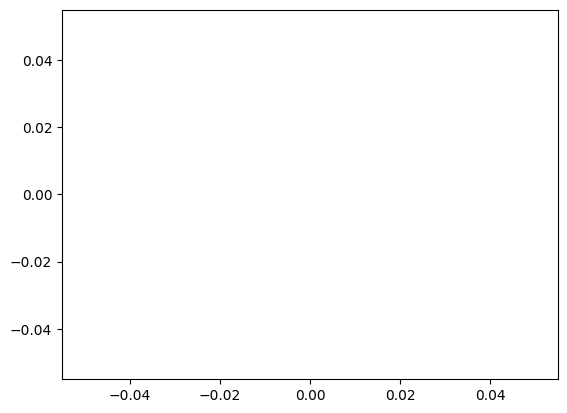

In [10]:
plt.plot(X5,y,'ro')

<blockquote>evaluate model

<blockquote> Mean Normalization adjust scaling

In [11]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You need to perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X = data[:, 0:5]
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    print(mu)
    sigma = np.zeros(X.shape[1])
    print(sigma)

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X, axis=0) #ต้องเอาทุก row มาเฉลี่ยกัน ดังนั้นต้องใช้ axis0
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    # ================================================================
    return X_norm, mu, sigma

In [12]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
Computed mean: [6.85617650e+04 5.98244424e+00 6.98925461e+00 3.97477500e+00
 3.62792203e+04]
Computed standard deviation: [1.06921565e+04 9.90545533e-01 1.00426584e+00 1.23128094e+00
 9.89875354e+03]


In [13]:
X_norm[:5]

array([[ 1.02726644, -0.30244235,  0.01984886,  0.0935814 , -1.33273546],
       [ 0.99950627,  0.02065081, -0.25733584, -0.71858093,  0.39336789],
       [-0.68037704, -0.11766688,  1.51700153,  0.93823023,  0.0609106 ],
       [-0.48788333,  1.21730078, -1.39656841, -0.58051333, -0.19891166],
       [-0.80241696, -0.95087978,  0.84652204,  0.20728413, -1.00266269]])

In [14]:
# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1) #เอาคอลัมน์ [1, 1, 1, ...] มารวมกับ metrix X_norm 
#axis = 0 is rows, axis=1 is columns

In [15]:
X[:5]

array([[ 1.        ,  1.02726644, -0.30244235,  0.01984886,  0.0935814 ,
        -1.33273546],
       [ 1.        ,  0.99950627,  0.02065081, -0.25733584, -0.71858093,
         0.39336789],
       [ 1.        , -0.68037704, -0.11766688,  1.51700153,  0.93823023,
         0.0609106 ],
       [ 1.        , -0.48788333,  1.21730078, -1.39656841, -0.58051333,
        -0.19891166],
       [ 1.        , -0.80241696, -0.95087978,  0.84652204,  0.20728413,
        -1.00266269]])

<blockquote>cost function

In [16]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    h = np.dot(X,theta) #size of h is (m x 1) and size of y is(m x 1)
    J = (1/(2 * m)) * np.sum(np.square(h-y)) #ระวังตัว m เพราะ m อยู่กับ 2
    
    # ==================================================================
    return J


<blockquote> Gradient Descent

In [17]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        h = np.dot(X, theta)
        print(h)
        theta = theta - (alpha / m) * np.dot((h - y),X)
        print(theta)
        
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

<blockquote> Learning curve

[0. 0. 0. ... 0. 0. 0.]
[123.53491662  22.8339171   15.79399906  12.28857526   6.50822142
  14.45997705]
[123.79629772 144.53283482 131.76957648 ...  85.05144574  73.72770931
 119.55197235]
[234.71634157  43.39548453  30.0496802   23.04100672  11.72290532
  27.53791468]
[235.06039889 275.19034904 249.28457555 ... 160.55227504 140.38585562
 227.13564697]
[334.77962403  61.91298708  42.9183554   32.47139096  15.85192482
  39.36429175]
[335.06620766 393.28604643 354.1349875  ... 227.59510469 200.60777259
 323.94487201]
[424.83657824  78.59151227  54.53626595  40.76273131  19.07169787
  50.05747852]
[424.95739826 500.01224017 447.72740562 ... 287.14425395 254.97594395
 411.05482369]
[505.88783703  93.61534256  65.02610907  48.07150941  21.53185118
  59.72483035]
[505.76083385 596.45073127 531.30695006 ... 340.0512761  304.02515558
 489.4337529 ]
[578.83396995 107.15009612  74.49840625  54.53158325  23.35919756
  68.46368708]
[578.39858756 683.58262668 605.97647424 ... 387.0685484  348.2456

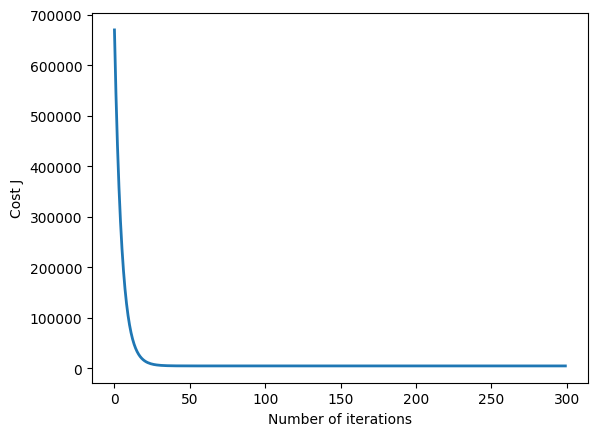

theta computed from gradient descent: [1235.34916616  231.54153855  163.62109064  121.70736825    1.244256
  149.69256872]
Predicted price of a Example 1: $1458
Predicted price of a Example 2: $1298
Predicted price of a Example 3: $1650


In [18]:
"""
Instructions
------------
We have provided you with the following starter code that runs
gradient descent with a particular learning rate (alpha). 

Your task is to first make sure that your functions - `computeCost`
and `gradientDescent` already work with  this starter code and
support multiple variables.

After that, try running gradient descent with different values of
alpha and see which one gives you the best result.

Finally, you should complete the code at the end to predict the price
of a 1650 sq-ft, 3 br house.

Hint
----
At prediction, make sure you do the same feature normalization.
"""
# Choose some alpha value - change this
alpha = 0.1 #adjust this one
num_iters = 300 #adjust this one

# init theta and run gradient descent
theta = np.zeros(6)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.
#prediction
Example1 = [1, 83444.99369, 5.310036748, 6.029291539, 2.43, 44807.98836]
Example2 = [1, 76609.91724, 3.770547698, 6.700456133, 3.21, 55430.31157]
Example3 = [1, 78685.83503, 7.020022836, 7.368314072, 5.14, 34767.78842]#ต้องมี 1 นำหน้าเสมอ

Example1[1:6] = (Example1[1:6]- mu) / sigma
price_1 = np.dot(Example1, theta)   

Example2[1:6] = (Example2[1:6]- mu) / sigma
price_2 = np.dot(Example2, theta)

Example3[1:6] = (Example3[1:6]- mu) / sigma
price_3 = np.dot(Example3, theta)
# ===================================================================

print('Predicted price of a Example 1: ${:.0f}'.format(price_1))
print('Predicted price of a Example 2: ${:.0f}'.format(price_2))
print('Predicted price of a Example 3: ${:.0f}'.format(price_3))

[0. 0. 0. ... 0. 0. 0.]
[12.35349166  2.28339171  1.57939991  1.22885753  0.65082214  1.44599771]
[12.37962977 14.45328348 13.17695765 ...  8.50514457  7.37277093
 11.95519724]
[24.58344841  4.54405992  3.14341663  2.44235361  1.28870891  2.87817502]
[24.63393758 28.76781376 26.21136952 ... 16.91478298 14.67484623
 23.79071149]
[36.69110558  6.78223292  4.69220149  3.64070236  1.91386817  4.29666241]
[36.76419732 42.94490433 39.10482561 ... 25.23000785 21.90685924
 35.50773662]
[48.67768619  8.99813668  6.22590429  4.82411475  2.52650466  5.70158916]
[48.77166989 56.98585659 51.85889757 ... 33.45189895 29.06943819
 47.1074546 ]
[60.54440099 11.19199486  7.74467334  5.99279872  3.12682001  7.09308333]
[60.65760326 70.8919599  64.47513892 ... 41.5815234  36.1632063
 58.59103567]
[72.29244864 13.36402885  9.24865547  7.14695915  3.71501278  8.4712718 ]
[72.42323269 84.66449173 76.9550853  ... 49.6199358  43.18878173
 69.95963841]
[83.92301582 15.51445782 10.73799607  8.28679799  4.2912785

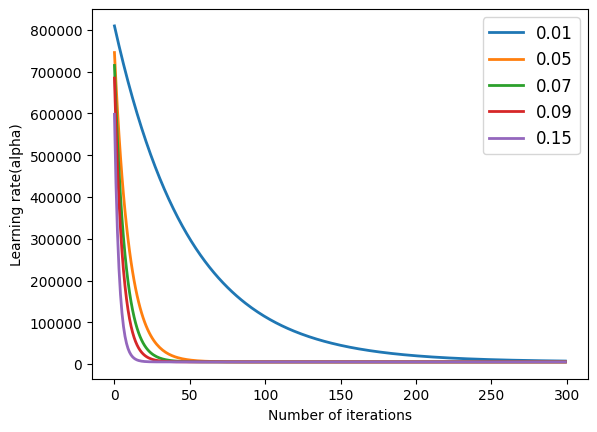

In [19]:
# Plot several learning rates and choose the best one

num_iters = 300

# List of the learning rates
Alpha = [0.01, 0.05, 0.07, 0.09, 0.15]

for alpha in Alpha:
    theta = np.zeros(6)
    theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
    
    # Plot the convergence graph
    plt.plot(np.arange(len(J_history)), J_history, label=alpha, lw=2)
    plt.xlabel('Number of iterations')
    plt.ylabel('Learning rate(alpha)')
    plt.legend(loc='best', prop={'size': 12})

plt.show()

<blockquote> Normal Equation

In [20]:
# Load data
data = np.loadtxt(r'D:\M.eng\Machine learning\midterm_crisis\Data\LinearRegressionData.txt') #load data
# y = 1, x = 2 - 5
X = data[:, 0:5]
y = data[:, 5]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [21]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        The value at each data point. A vector of shape (m, ).
    
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    theta = np.zeros(X.shape[1])
    
    # ===================== YOUR CODE HERE ============================
    theta = np.dot(np.dot(np.linalg.pinv(np.dot(X.T,X)),X.T),y) #มาจากตัวสมการthetaด้านบน
    
    # =================================================================
    return theta

In [22]:
# Forecast the housing prices of these 3 examples:
Example1 = [83444.99369, 5.310036748, 6.029291539, 2.43, 44807.98836]
Example2 = [76609.91724, 3.770547698, 6.700456133, 3.21, 55430.31157]
Example3 = [78685.83503, 7.020022836, 7.368314072, 5.14, 34767.78842]

<blockquote>Data for Prediction from here

In [23]:
# Calculate the parameters from the normal equation
theta = normalEqn(X, y);

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));

# ====================== YOUR CODE HERE ======================
Example1 = [1, 83444.99369, 5.310036748, 6.029291539, 2.43, 44807.98836]
Example2 = [1, 76609.91724, 3.770547698, 6.700456133, 3.21, 55430.31157]
Example3 = [1, 78685.83503, 7.020022836, 7.368314072, 5.14, 34767.78842]
price_1 = np.dot(Example1, theta)
price_2 = np.dot(Example2, theta)
price_3 = np.dot(Example3, theta)

# ============================================================

print('Predicted price of a Example1: ${:.0f}'.format(price_1))
print('Predicted price of a Example2: ${:.0f}'.format(price_2))
print('Predicted price of a Example3: ${:.0f}'.format(price_3))

Theta computed from the normal equations: [-2.63724612e+03  2.16552703e-02  1.65182807e+02  1.21190394e+02
  1.01053407e+00  1.51223655e-02]
Predicted price of a Example1: $1458
Predicted price of a Example2: $1298
Predicted price of a Example3: $1650
